In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df=pd.read_csv("C:\\Users\\suraj\\Downloads\\train (1).csv")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test_df=pd.read_csv("C:\\Users\\suraj\\Downloads\\test.csv")
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
train_df['Age']=train_df['Age'].fillna(train_df['Age'].mean())


In [7]:
train_df.drop(columns='Cabin',inplace=True)

In [8]:
train_df['Embarked']=train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

In [9]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
test_df['Age']=test_df['Age'].fillna(test_df['Age'].mean())

In [11]:
test_df.drop(columns='Cabin',inplace=True)

In [12]:
test_df['Fare'] = test_df['Fare'].fillna(test_df.groupby('Pclass')['Fare'].transform('median'))

In [13]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
train_df.duplicated().sum()

0

In [15]:
test_df.duplicated().sum()

0

<Axes: >

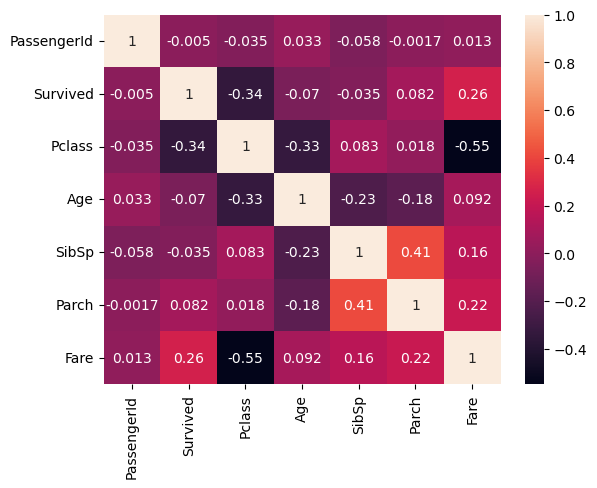

In [16]:
sns.heatmap(train_df.select_dtypes(include=['float','int']).corr(),annot=True)

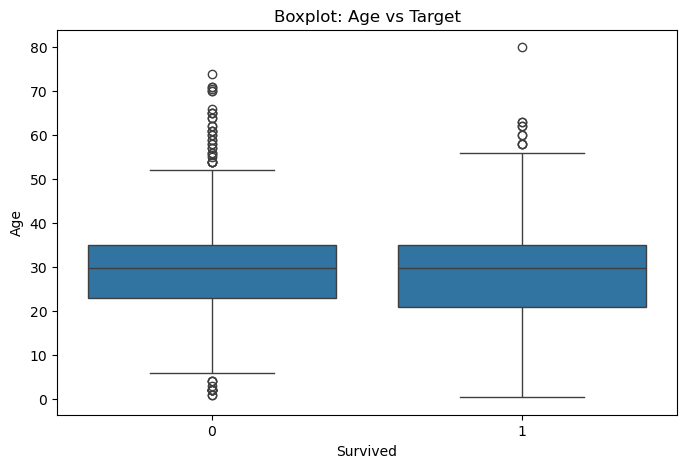

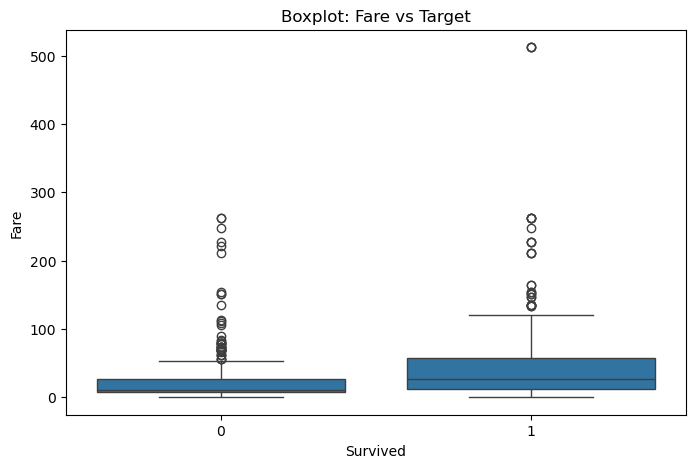

In [17]:
features = ['Age', 'Fare']

# Döngü ile her özellik için bir boxplot çiz
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=train_df, x='Survived', y=feature)
    plt.title(f"Boxplot: {feature} vs Target")
    plt.show()

Text(0.5, 1.0, 'Survived in test Dataset')

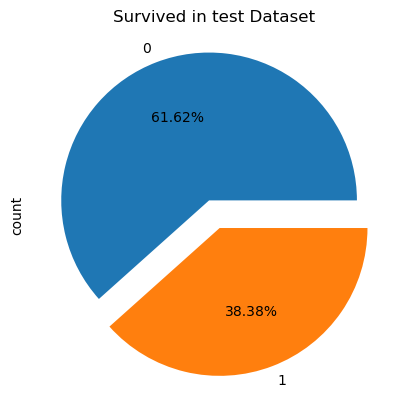

In [18]:
sur=train_df['Survived'].value_counts()
sur.plot.pie(explode=[0.1,0.1],autopct='%1.2f%%')
plt.title('Survived in test Dataset')

In [19]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()

In [22]:
for i in train_df['Sex']:
    if train_df['Sex'].dtype=='object':
         train_df['Sex']= le.fit_transform(train_df['Sex'])
    

In [23]:
for i in test_df['Sex']:
    if test_df['Sex'].dtype=='object':
         test_df['Sex']= le.fit_transform(test_df['Sex'])
    

In [24]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.50000,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.00000,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.00000,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",1,27.00000,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.00000,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",1,30.27259,0,0,359309,8.0500,S


In [25]:
train_df=pd.get_dummies(train_df,columns=['Embarked'], drop_first=True)
test_df=pd.get_dummies(test_df,columns=['Embarked'], drop_first=True)

In [26]:
train_df.Embarked_Q=train_df.Embarked_Q.astype(int)
train_df.Embarked_S=train_df.Embarked_S.astype(int)

test_df.Embarked_Q=test_df.Embarked_Q.astype(int)
test_df.Embarked_S=test_df.Embarked_S.astype(int)

In [27]:
train_df['Embarked_S'].value_counts()

Embarked_S
1    646
0    245
Name: count, dtype: int64

In [28]:
test_df['Embarked_Q'].value_counts()

Embarked_Q
0    372
1     46
Name: count, dtype: int64

In [29]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,1


In [30]:
from sklearn.model_selection import train_test_split

X=train_df.drop(columns=['Survived','Name','PassengerId','Ticket'])
y=train_df['Survived']

X_train, X_val, y_train, y_val=train_test_split(X,y,test_size=0.2, random_state=10)

X_test=test_df.drop(columns=['Name','PassengerId','Ticket'])

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_val=sc.transform(X_val)
X_test=sc.transform(X_test)

**Logistic Regression**

In [109]:
from sklearn.linear_model import LogisticRegression

In [117]:
lr=LogisticRegression(random_state=23)

In [119]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=23)

In [143]:
lr_predict=lr.predict(X_val)

In [145]:
len(lr_predict)

179

In [149]:
logistic_regression_accuracy_score=accuracy_score(y_val,lr_predict)
print("Accuracy_score is",logistic_regression_accuracy_score)

Precision_score=precision_score(y_val,lr_predict)
print("Precision_score is",Precision_score)

recall=recall_score(y_val,lr_predict)
print("Recall score is",recall)

F1_score=f1_score(y_val,lr_predict)
print("F1 score is",F1_score)

Accuracy_score is 0.8212290502793296
Precision_score is 0.75
Recall score is 0.7258064516129032
F1 score is 0.7377049180327869


In [176]:
lr_xtest=lr.predict(X_test)
lr_xtest

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

**Decision Tree Classifier**

In [154]:
from sklearn.tree import DecisionTreeClassifier

In [158]:
dt=DecisionTreeClassifier(random_state=20)


In [160]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=20)

In [166]:
dt_predict=dt.predict(X_val)

In [168]:
Decision_Tree_Accuracy_score=accuracy_score(y_val,dt_predict)
print("Accuracy_score is",Decision_Tree_Accuracy_score)

Precision_score=precision_score(y_val,dt_predict)
print("Precision_score is",Precision_score)

recall=recall_score(y_val,dt_predict)
print("Recall score is",recall)

F1_score=f1_score(y_val,dt_predict)
print("F1 score is",F1_score)

Accuracy_score is 0.7821229050279329
Precision_score is 0.6666666666666666
Recall score is 0.7419354838709677
F1 score is 0.7022900763358778


In [174]:
dt_Xtest=lr.predict(X_test)
dt_Xtest

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

**Random Forest Classifier**

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid={
    'n_estimators':[100,200,300],
    'max_depth':[1,5,10],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'criterion':['gini','entropy']
    
}

In [35]:
rfc=RandomForestClassifier(random_state=10)

In [36]:
grid_search=GridSearchCV(estimator=rfc, param_grid=param_grid)

In [37]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [38]:
best_param=grid_search.best_params_
best_param

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

In [39]:
new_model=RandomForestClassifier(criterion= 'gini',max_depth= 10,min_samples_leaf= 4,min_samples_split= 2, n_estimators= 200,random_state=10)

In [40]:
new_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=200,
                       random_state=10)

In [41]:
y_pre=new_model.predict(X_val)

In [42]:
from sklearn.metrics import *

In [137]:
len(y_pre)

179

In [107]:
Random_forest_Accuracy_score=accuracy_score(y_val,y_pre)
print("Accuracy_score is",Random_forest_Accuracy_score)

Precision_score=precision_score(y_val,y_pre)
print("Precision_score is",Precision_score)

recall=recall_score(y_val,y_pre)
print("Recall score is",recall)

F1_score=f1_score(y_val,y_pre)
print("F1 score is",F1_score)

Accuracy_score is 0.8379888268156425
Precision_score is 0.7796610169491526
Recall score is 0.7419354838709677
F1 score is 0.7603305785123967


In [44]:
test_pred=new_model.predict(X_test)

In [162]:
test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

**XGBoost classifier**

In [196]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 163.8 kB/s eta 0:12:43
   ---------------------------------------- 0.0/124.9 MB 163.8 kB/s eta 0:12:43
   ---------------------------------------- 0.1/124.9 MB 233.8 kB/s eta 0:08:55
   ---------------------------------------- 0.1/124.9 MB 500.5 kB/s eta 0:04:10
   ---------------------------------------- 0.2/124.9 MB 551.6 kB/s eta 0:03:47
   ---------------------------------------- 0.2/124.9 MB 513.4 kB/s eta 0:04:03
   ---------------------------------------- 0.4/124.9 MB 1.0 MB/s eta 0:02:03
   ---------------------------------------- 0.8/124.9 MB 1.6 MB/s eta 0:01:16
   ---------------------------------------- 1.1/124.9 MB 2.1 MB/s eta 0:01:01
  

In [198]:
from xgboost import XGBClassifier

In [200]:
parameter_grid={
    "n_estimators": [ 100, 200, 300],
     'max_depth': [3, 4, 5],
     "learning_rate": [0.1, 0.2, 0.5, 1],
     "subsample": [0.5, 0.8, 1],
     "colsample_bytree": [0.4, 0.5, 0.7]
 
    
}

In [202]:
xgb=XGBClassifier(random_state=15)

In [204]:
grid=GridSearchCV(estimator=xgb, param_grid=parameter_grid)

In [206]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=15, ...),
             param_grid={'colsample_bytree': [0.4, 0.5, 0.7],
                         'learning_rate': [0.1, 0.2, 0.5, 1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.5, 0.8, 1]})

In [210]:
best_par=grid.best_params_
best_par

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 200,
 'subsample': 0.5}

In [212]:
model=XGBClassifier(n_estimators=200,max_depth=5,colsample_bytree=0.7,learning_rate=0.1,subsample=0.5)

In [214]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [216]:
xgb_predict=model.predict(X_val)

In [218]:
xgb_Accuracy_score=accuracy_score(y_val,xgb_predict)
print("Accuracy_score is",xgb_Accuracy_score)

Precision_score=precision_score(y_val,xgb_predict)
print("Precision_score is",Precision_score)

recall=recall_score(y_val,xgb_predict)
print("Recall score is",recall)

F1_score=f1_score(y_val,xgb_predict)
print("F1 score is",F1_score)

Accuracy_score is 0.8324022346368715
Precision_score is 0.7758620689655172
Recall score is 0.7258064516129032
F1 score is 0.75


In [222]:
compare=pd.DataFrame({
    'Models':['Logistic','Decision Tree','Random Forest','XGboost'],
    'Accuracy':[logistic_regression_accuracy_score,Decision_Tree_Accuracy_score,Random_forest_Accuracy_score, xgb_Accuracy_score]
})

C:\Users\suraj\AppData\Local\Temp\ipykernel_13120\2577510625.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x="Accuracy", y="Models", data=compare, palette="Blues_d")


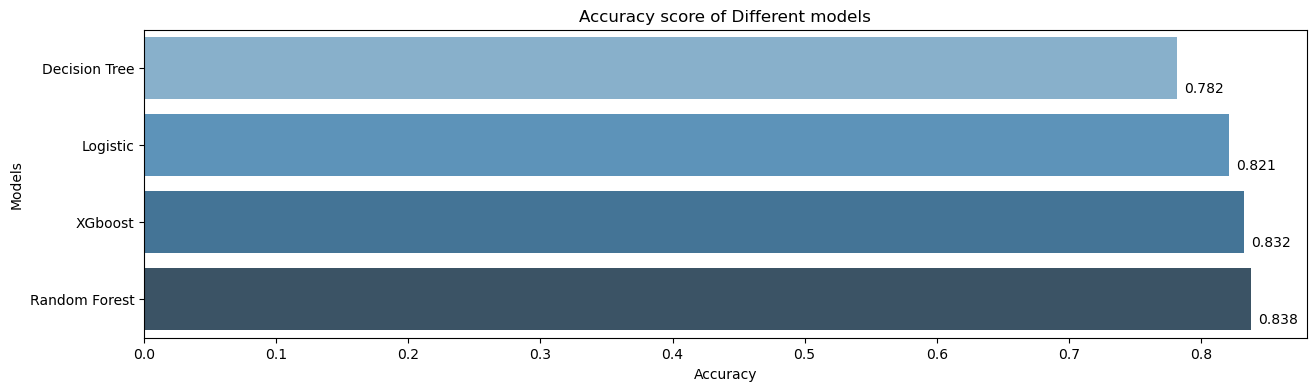

In [234]:
compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(15,4))
ax=sns.barplot(x="Accuracy", y="Models", data=compare, palette="Blues_d")
plt.title("Accuracy score of Different models")

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 0.9),
                xytext=(5, 10), textcoords='offset points')


In [236]:
result = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_pred
    })

In [131]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [48]:
result.to_csv("C:\\Users\\suraj\\Downloads\\prediction.csv",index=False)

In [238]:
result['Survived'].value_counts()

Survived
0    276
1    142
Name: count, dtype: int64